In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()
from datetime import datetime, timedelta
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6
import math
import scipy.stats
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('DATA/PrepData.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [95]:
#df = df.drop('BTC-USD', axis=1)

In [96]:
N = len(df.columns)

In [97]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights / np.sum(weights)

## Monthly dropdowns

Investor does not want to be down more than x% in mounthly period. Becouse of that I will use simple return instead of logaritmic one.

In [98]:
# days we want to 
n = 30

In [99]:
returns = df.pct_change(n).dropna()

In [117]:
def calculate_simple_return(returns, weights):    
    return np.sum(returns.mean()*weights) * 360/n

In [101]:
def dropdowns(returns, weights):    
    returns = returns * weights
    returns['total'] = returns.sum(axis=1)
    deepest_dropdown = returns['total'].min()
    return deepest_dropdown

In [102]:
mc_portfolio_returns = []
mc_portfolio_dropdowns = []
mc_weights = []

for sim in range(30000):
    
    weights = gen_weights(N)
    mc_weights.append(weights)
    
    annual_return = calculate_simple_return(returns, weights)
    mc_portfolio_returns.append(annual_return)
    
    deepest_dropdown = dropdowns(returns, weights)
    mc_portfolio_dropdowns.append(deepest_dropdown)

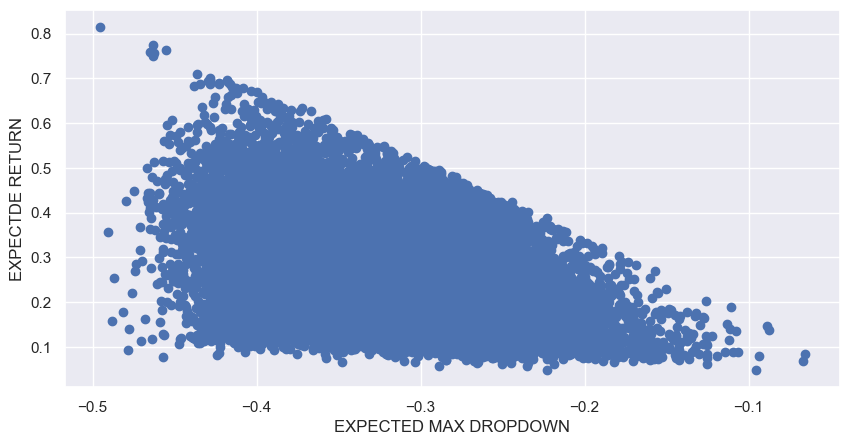

In [114]:
plt.figure(dpi=100,figsize=(10,5))
plt.scatter(mc_portfolio_dropdowns,mc_portfolio_returns)
plt.ylabel('EXPECTDE RETURN')
plt.xlabel('EXPECTED MAX DROPDOWN');

## Quarterly dropdowns

In [118]:
# days we want to 
n = 90

returns = df.pct_change(n).dropna()

In [119]:
mc_portfolio_returns = []
mc_portfolio_dropdowns = []
mc_weights = []

for sim in range(30000):
    
    weights = gen_weights(N)
    mc_weights.append(weights)
    
    annual_return = calculate_simple_return(returns, weights)
    mc_portfolio_returns.append(annual_return)
    
    deepest_dropdown = dropdowns(returns, weights)
    mc_portfolio_dropdowns.append(deepest_dropdown)

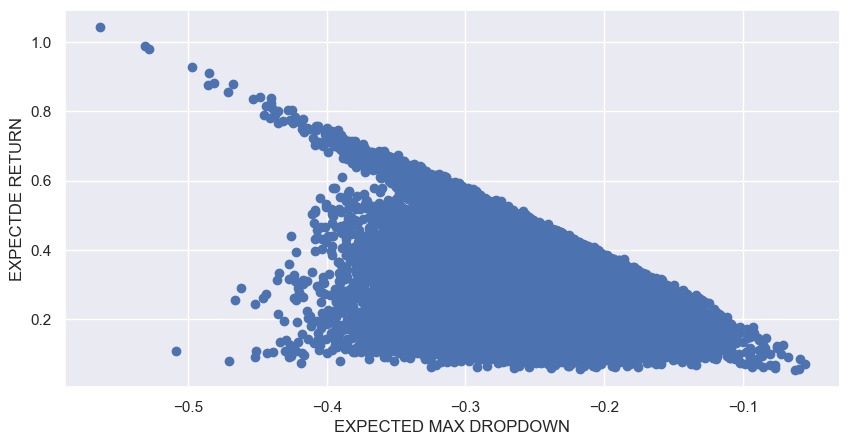

In [120]:
plt.figure(dpi=100,figsize=(10,5))
plt.scatter(mc_portfolio_dropdowns,mc_portfolio_returns)
plt.ylabel('EXPECTDE RETURN')
plt.xlabel('EXPECTED MAX DROPDOWN');